# Funciones util (ignorar)

In [ ]:
def tokenize_and_add_padding(words, tokenizer, max_sequence_length):
    tokenizer.fit_on_texts(words)
    sequences = tokenizer.texts_to_sequences(words)
    word_index = tokenizer.word_index

    data = tf.keras.preprocessing.sequence.pad_sequences(
        sequences,
        value=0,
        maxlen=max_sequence_length
    )

    return sequences, word_index, data

In [ ]:
def plot_history(history, metric):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training: {history.history["loss"][-1]:.2f}, validation: {history.history["val_loss"][-1]:.2f}')
    plt.legend()

    plt.subplot(1, 2, 2)
    #plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history[f'{metric}'], label='Training')
    plt.plot(history.history[f'val_{metric}'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training: {history.history[f"{metric}"][-1]:.2f}, validation: {history.history[f"val_{metric}"][-1]:.2f}')
    plt.legend()

    plt.show()

# Notas



Pipeline sugerido: <br>
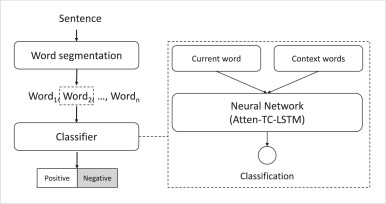

Fuente: https://reader.elsevier.com/reader/sd/pii/S092523121931687X?token=FC73D0A2D97F651107829FA32607FEB1805FAEC2511A5EE011CEBD5C1E56D90AD074665F19F578230F696CD46DB25CA2&originRegion=eu-west-1&originCreation=20230307084138

In [ ]:
import os.path
import requests
from shutil import unpack_archive

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

# Limpieza de los datos

In [ ]:
# datos preparados
url_datos_moodle = "https://gist.githubusercontent.com/w-dan/b84bdbfbd86b610a89aa0aa57e6efb5e/raw/aeaffaa9d26c66678b697ecb9fd99fd0c8eaca52/papers.csv"

In [ ]:
df = pd.read_csv(url_datos_moodle)
df

,id,title,abstract,Unnamed: 3,keywords,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,Ensemble Statistical and Heuristic Models for ...,Statistical word alignment models need large a...,NaN,"statistical word alignment, ensemble learning,...",NaN,NaN,NaN
1,2,Improving Spectral Learning by Using Multiple ...,Spectral learning algorithms learn an unknown ...,NaN,"representation, spectral learning, discrete fo...",NaN,NaN,NaN
2,3,Applying Swarm Ensemble Clustering Technique f...,Number of defects remaining in a system provid...,NaN,"software defect prediction, particle swarm opt...",NaN,NaN,NaN
3,4,Reducing the Effects of Detrimental Instances,Not all instances in a data set are equally be...,NaN,"filtering, label noise, instance weighting",NaN,NaN,NaN
4,5,Concept Drift Awareness in Twitter Streams,Learning in non-stationary environments is not...,NaN,"twitter, adaptation models, time-frequency ana...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
443,444,A Machine Learning Tool for Supporting Advance...,"In the current era of big data, high volumes o...",NaN,"machine-learning,unsupervised-learning,knowled...",NaN,NaN,NaN
444,445,Advanced ECHMM-Based Machine Learning Tools fo...,We present a novel approach for accurate chara...,NaN,"workload characterization,hmm,cepstral coeffic...",NaN,NaN,NaN
445,446,A Cluster Analysis of Challenging Behaviors in...,"We apply cluster analysis to a sample of 2,116...",NaN,"cluster analysis,autism spectrum disorder,chal...",NaN,NaN,NaN
446,447,Predicting Psychosis Using the Experience Samp...,Smart phones have become ubiquitous in the rec...,NaN,"predicting psychosis,esm,mhealth,svm,gaussian ...",NaN,NaN,NaN


Separación de variable objetivo y demás atributos

In [ ]:
y = df['keywords']
X = df.drop(['keywords'], axis=1)

Comprobamos las columnas Unnamed, tienen muchos valores NaN y parecen raras

In [ ]:
print("El dataset tiene ", len(df), " filas")

print("===== NULOS =====")
df.isnull().sum()

El dataset tiene  448  filas
===== NULOS =====


id              0
title           0
abstract        0
Unnamed: 3    448
keywords        0
Unnamed: 5    443
Unnamed: 6    444
Unnamed: 7    447
dtype: int64

In [ ]:
X = X.drop(['id', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1)
X

,title,abstract
0,Ensemble Statistical and Heuristic Models for ...,Statistical word alignment models need large a...
1,Improving Spectral Learning by Using Multiple ...,Spectral learning algorithms learn an unknown ...
2,Applying Swarm Ensemble Clustering Technique f...,Number of defects remaining in a system provid...
3,Reducing the Effects of Detrimental Instances,Not all instances in a data set are equally be...
4,Concept Drift Awareness in Twitter Streams,Learning in non-stationary environments is not...
...,...,...
443,A Machine Learning Tool for Supporting Advance...,"In the current era of big data, high volumes o..."
444,Advanced ECHMM-Based Machine Learning Tools fo...,We present a novel approach for accurate chara...
445,A Cluster Analysis of Challenging Behaviors in...,"We apply cluster analysis to a sample of 2,116..."
446,Predicting Psychosis Using the Experience Samp...,Smart phones have become ubiquitous in the rec...


In [ ]:
y = pd.DataFrame(y, columns=['keywords'])
y

,keywords
0,"statistical word alignment, ensemble learning,..."
1,"representation, spectral learning, discrete fo..."
2,"software defect prediction, particle swarm opt..."
3,"filtering, label noise, instance weighting"
4,"twitter, adaptation models, time-frequency ana..."
...,...
443,"machine-learning,unsupervised-learning,knowled..."
444,"workload characterization,hmm,cepstral coeffic..."
445,"cluster analysis,autism spectrum disorder,chal..."
446,"predicting psychosis,esm,mhealth,svm,gaussian ..."


Hacer un bag of words con estos abstracts produciría una segmentación demencial que nos haría perder el hilo, aunque aún es pronto para descartarlo. Podemos emplear alguna técnica de [word embedding](https://es.wikipedia.org/wiki/Word_embedding):

# Estudio y preprocesamiento de los datos

Vamos a estudiar la naturaleza de los datos, como las frecuencias de las palabras y la frecuencia con la que aparecen, y el impacto que tienen sobre el modelo más adelante:

Vamos a separar los valores de `targets`

In [ ]:
# nos deshacemos de la etiqueta de la columna (se incluye cuando llamamos a .values como primer valor)
targets = y.values[:,0]

In [ ]:
words = []

for abs in targets:
    for w in abs.split(','):
        words.append(w.strip())

print("Terminado, hay", len(words), "palabras")

Terminado, hay 2126 palabras


Vamos eliminar los que tengan una frecuencia poco aceptable.

In [ ]:
words_df = pd.DataFrame(words, columns=y.columns)
words_df

,keywords
0,statistical word alignment
1,ensemble learning
2,heuristic word alignment
3,representation
4,spectral learning
...,...
2121,roc analysis
2122,monte carlo
2123,bayes methods
2124,monte carlo methods


Text(0, 0.5, 'Key')

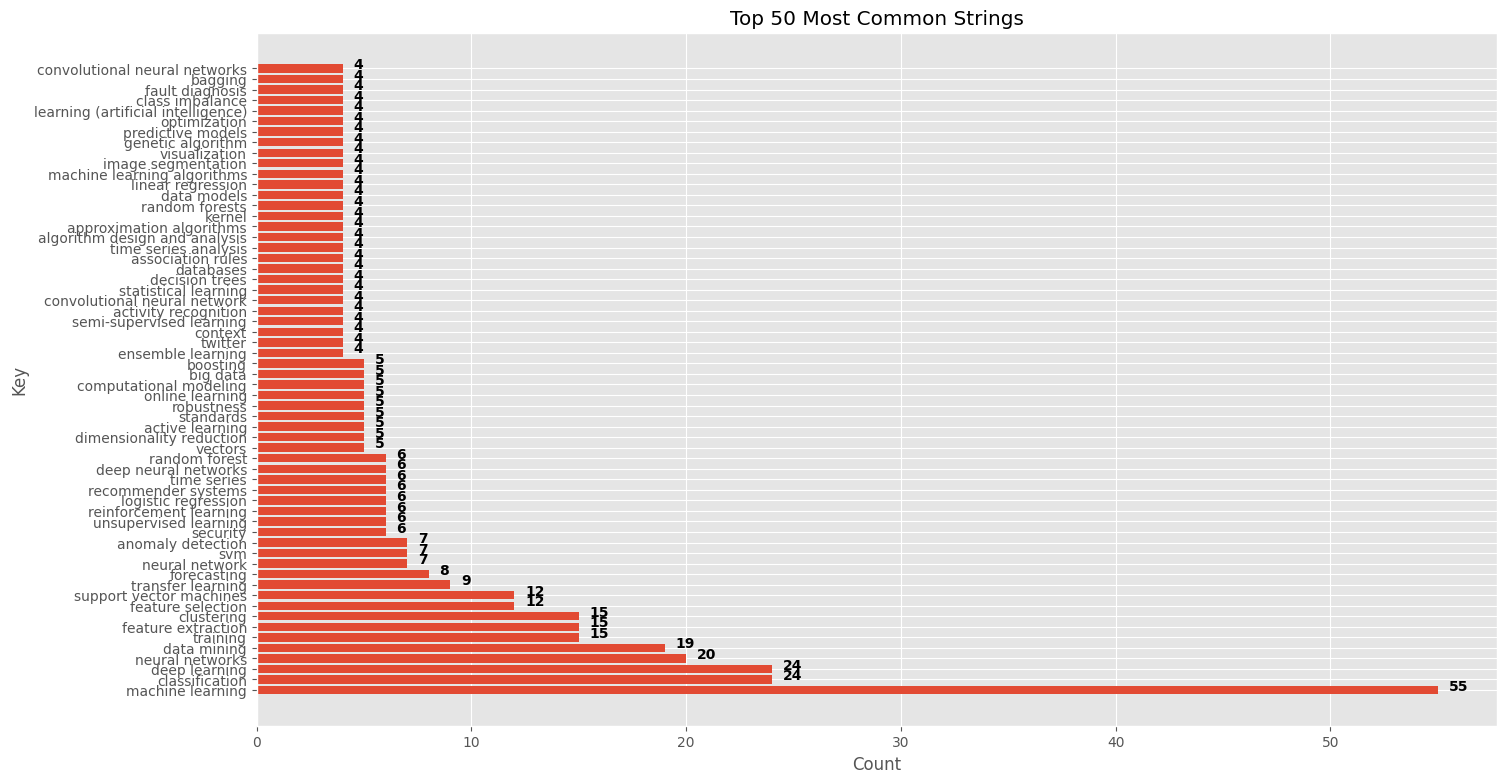

In [ ]:
from collections import Counter

string_counts = Counter(words_df.values.flatten())
top_strings = string_counts.most_common(60)

labels, counts = zip(*top_strings)

fig, ax = plt.subplots()
ax.barh(labels, counts, align='center')

# Add count label for each bar
for i, v in enumerate(counts):
    ax.text(v + 0.5, i, str(v), color='black', fontweight='bold')

plt.title("Top 50 Most Common Strings")
plt.xlabel("Count")
plt.ylabel("Key")

In [ ]:
print(string_counts.get("privacy"))

3


Viendo que las palabras más comunes aparecen al menos 4 veces, vamos a dar algo de margen a los datos eliminando aquellas que aparezcan menos de 3 veces, es decir, 1 o 2 veces únicamente, ya que resultan poco relevantes.

In [ ]:
poco_frecuentes = 0
una_sola_vez = 0

# dejamos la elegancia de lado
for i in string_counts:
  if string_counts.get(i) < 3:
    poco_frecuentes +=1

for i in string_counts:
  if string_counts.get(i) < 2:
    una_sola_vez +=1

print("De las", len(words_df), "palabras totales hay", poco_frecuentes, "palabras que aparecen menos de 3 veces, de las cuales", una_sola_vez, "aparecen una sola vez.")

De las 2126 palabras totales hay 1436 palabras que aparecen menos de 3 veces, de las cuales 1312 aparecen una sola vez.


In [ ]:
print("Es decir, un", (una_sola_vez/len(words_df))*100,"% de las palabras aparecen una sola vez")

Es decir, un 61.71213546566322 % de las palabras aparecen una sola vez


In [ ]:
arr = words_df.values.flatten()

# contar ocurrencias de todas las palabras
unique_vals, val_counts = np.unique(arr, return_counts=True)

# filtrar los valores con más de 2 o 3 repeticiones
filtered_vals_under2 = unique_vals[val_counts >= 2]         # las leyes de DeMorgan lo convierten en < 2, eliminando los que aparecen una sola vez
filtered_vals_under3 = unique_vals[val_counts >= 3]         # las leyes de DeMorgan lo convierten en < 3, eliminando los que aparecen dos veces o menos

# obtenemos al quitar 
filtered_arr_under2 = arr[np.isin(arr, filtered_vals_under2)]       # quitamos los que aparecen una sola vez
filtered_arr_under3 = arr[np.isin(arr, filtered_vals_under3)]       # quitamos los que aparecen dos veces o menos

print("Tal y como vimos antes,", len(words_df)-len(filtered_arr_under2), "palabras que aparecen una vez y", len(words_df)-len(filtered_arr_under3), "palabras que aparecen dos veces o menos")
print("Lo cual nos deja con", len(filtered_arr_under2), "palabras si quitamos las que aparecen una vez y", len(filtered_arr_under3), "si quitamos las que aparecen dos veces o menos")

Tal y como vimos antes, 1312 palabras que aparecen una vez y 1560 palabras que aparecen dos veces o menos
Lo cual nos deja con 814 palabras si quitamos las que aparecen una vez y 566 si quitamos las que aparecen dos veces o menos


Vamos a guardar ambos arrays en dataframes separados para hacer pruebas distintas, por si los valores que aparecen dos veces pudieran ser de utilidad. Hemos descartado de manera definitiva los que hacen una única aparición.

In [ ]:
words_df_under2 = pd.DataFrame(filtered_arr_under2, columns=words_df.columns)
words_df_under3 = pd.DataFrame(filtered_arr_under3, columns=words_df.columns)

In [ ]:
words_df_under3

,keywords
0,ensemble learning
1,twitter
2,context
3,vectors
4,dimensionality reduction
...,...
561,svm
562,random forests
563,neural networks
564,feature selection


## Tokenize and add Padding

1. Abstracts
2. Keywords

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)

In [ ]:
y_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)

In [ ]:
sequences, word_index, data = tokenize_and_add_padding(abstracts, tokenizer, MAX_SEQUENCE_LENGTH)

## Frecuencia 3 o mayor

## Frecuencia 2 o mayor

In [ ]:
max_len = sorted(len(target) for target in targets)[-1]

In [ ]:
y_sequences, y_word_index, y_data = tokenize_and_add_padding(targets, y_tokenizer, max_len)

In [ ]:
OUTPUT_SIZE = len(y_word_index.keys())
OUTPUT_SIZE

In [ ]:
y_word_index

In [ ]:
targets[440]

In [ ]:
k = list(y_word_index.keys())
k[21]

In [ ]:
y_data[0]

In [ ]:
multi_hot_tokenized = []

for i in range(len(y_data)):
    multi_hot_tokenized.append(np.zeros(OUTPUT_SIZE+1))
    for t in y_data[i]:
        if t != 0:
            multi_hot_tokenized[i][t] = 1

multi_hot_tokenized = np.asarray(multi_hot_tokenized)
multi_hot_tokenized[0]

In [ ]:
y_data[0]

In [ ]:
multi_hot_tokenized[0][209]

# Entrenamiento de word embedding con GLoVe

Vamos a entrenar una capa de word embedding con el conjunto de datos de Stanford:

In [ ]:
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (16, 9),'figure.dpi': 100})

tf.compat.v1.disable_eager_execution()  # Esto es por un problema (creo) con las RTX2070

In [ ]:
GLOVE_URL = 'http://nlp.stanford.edu/data/glove.6B.zip'
GLOVE_FILE = 'glove.6B.zip'
GLOVE_DIR = 'glove'

if not os.path.isdir(GLOVE_DIR):
    # Descargamos el dataset comprimido de GloVe (si no lo tenemos ya)
    if not os.path.exists(GLOVE_FILE):
        with open(GLOVE_FILE, 'wb') as f:
            r = requests.get(GLOVE_URL, allow_redirects=True)
            f.write(r.content)
    # Lo descomprimimos en el directorio 'glove'
    unpack_archive(GLOVE_FILE, 'glove/')

Establecemos parámetros

In [ ]:
lens = [len(s) for s in X['abstract']]

lens = pd.DataFrame(lens)


Establecemos MAX_SEQUENCE_LENGTH a la mediana de las longitudes de los abstracts, de aproximadamente 986 palabras.

In [ ]:
# Dimensiones de los word vectors (50, 100, 200 o 300)
EMBEDDING_DIM = 50
# Tamaño máximo de nuestro vocabulario (se escogerán las más frecuentes)
MAX_VOCAB_SIZE = 10000
# El tamaño de la frase más larga con la que alimentar el modelo
MAX_SEQUENCE_LENGTH = int(lens.median())

In [ ]:
del lens

We load the Embedding of the dimension specified in the configuration

In [ ]:
print(f'Loading GloVe {EMBEDDING_DIM}-d embedding... ', end='')
word2vec = {}
with open(os.path.join(GLOVE_DIR, f'glove.6B.{EMBEDDING_DIM}d.txt')) as f:
    for line in f:
        values = line.split()
        word2vec[values[0]] = np.asarray(values[1:], dtype='float32')
print(f'done ({len(word2vec)} word vectors loaded)')

Loading GloVe 50-d embedding... done (400000 word vectors loaded)


@TODO: en vez de targets, usar words_df_under3 y words_df_under2, entrenar un glove con cada uno

In [ ]:
print('Loading training articles dataset... ', end='')

targets = y.values[:,0]
abstracts = X.values[:,1]
titles = X.values[:,0]

print(f'done ({len(y)} abstracts loaded)')
print(f'Biggest abstract length:  {max(len(s) for s in abstracts)}')
print(f'Smallest abstract length: {min(len(s) for s in abstracts)}')
print(f'Avg. abstract length:     {np.mean([len(s) for s in abstracts])}')
# print(f'Median abstract length:   {sorted(len(s) for s in X)[len(X) // 2]}')
print('-' * 20)
print(f'Example abstract: {X.iloc[9]}')
print(f'Example keywords: {targets[9]}')

Loading training articles dataset... done (448 abstracts loaded)
Biggest abstract length:  2008
Smallest abstract length: 10
Avg. abstract length:     1038.9441964285713
--------------------
Example abstract: title       Detection of abnormal human behavior using a m...
abstract    Automatic detection of abnormal events is one ...
Name: 9, dtype: object
Example keywords: abnormal event detection, low-rank approximation, adaptive learning


# Embedding layer

In [ ]:
print('Loading embedding with GloVe vectors... ', end='')
# Cargamos sólo las palabras elegidas de nuestro conjunto de datos
num_words = min(MAX_VOCAB_SIZE, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Creamos la capa de embedding
embedding_layer = tf.keras.layers.Embedding(
  input_dim=num_words,
  output_dim=EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False,
)
print('done')

# F1 score

In [2]:
import tensorflow_addons as tfa

ModuleNotFoundError: ignored

In [3]:
f1_score = tfa.metrics.F1Score(num_classes=OUTPUT_SIZE+1, threshold=0.5, average="macro")

NameError: ignored

# CNN model

In [ ]:
metric = 'binary_accuracy'

@TODO 🐾 Comprobar el +1 a la OUTPUT_SIZE

In [ ]:
input_ = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = tf.keras.layers.Conv1D(16, kernel_size=3, activation='relu')(x)
# x = tf.keras.layers.Conv1D(8, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(OUTPUT_SIZE+1, activation='sigmoid')(x)

model = tf.keras.Model(input_, output)
# Compile the model with F1 score metric
model.compile(
    optimizer='adam', #tf.keras.optimizers.RMSprop(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=[f1_score]
)
model.summary()

In [ ]:
assert model.output_shape != multi_hot_tokenized.shape

In [ ]:
checkpoint_filepath = './checkpoints'

In [ ]:
# create checkpoint
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# TODO : Model does not predict correctly. It only predicts 'machine learning' for every abstract with acc > 0.5 (see testing down)
history = model.fit(data, multi_hot_tokenized, epochs=10, validation_split=0.2)  # callbacks=[model_checkpoint_callback]

## Plot this shitty history XD

In [ ]:
plot_history(history, metric=metric)

### Test prediction on trained set

In [ ]:
abstracts[200]

In [ ]:
_, _, test_data = tokenize_and_add_padding([abstracts[440], abstracts[200]], tokenizer, MAX_SEQUENCE_LENGTH)

In [ ]:
y_hat = model.predict(test_data)

In [ ]:
keys = []

for i, prediction in enumerate(y_hat):
    keys.append(np.argsort(prediction)[::-1][:5])
    print(np.sort(prediction))

keys

In [ ]:
# print values
for i in keys:
    print("------------------------NEXT------------------------")
    for j in i:
        print(k[j])

In [ ]:
targets[440]

In [ ]:
targets[200]

# RNN model

In [ ]:
# XD
